In [1]:
# Mean Shift Clustering Demonstration
# Author: [Your Name]
# Purpose: Explore Mean Shift clustering behavior for different data shapes

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from sklearn.datasets import make_blobs, make_moons, make_circles
import time
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

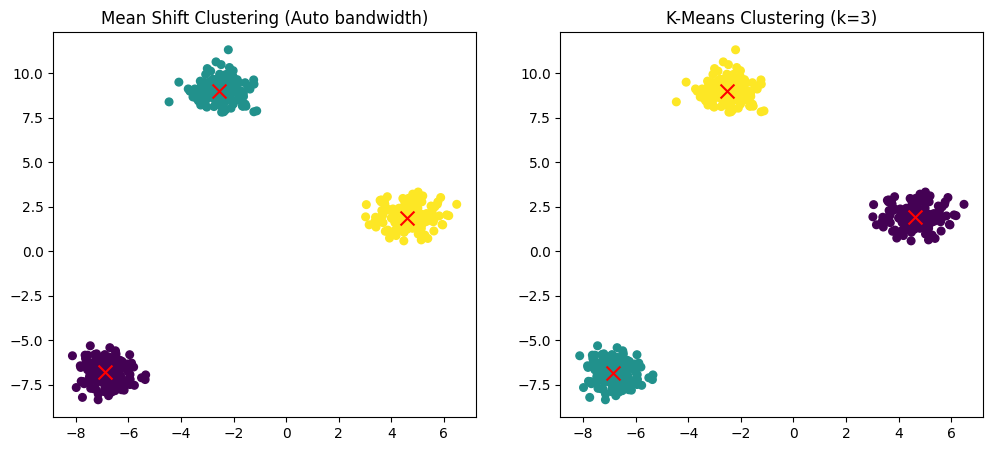

In [6]:
# --- 1. Dataset 1: Simple Blobs ---
X_blobs, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=42)

# Estimate bandwidth automatically
bandwidth = estimate_bandwidth(X_blobs, quantile=0.2, n_samples=500)

# Apply Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_blobs)
labels_ms = ms.labels_
cluster_centers = ms.cluster_centers_

# Apply K-Means for comparison
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_blobs)
labels_kmeans = kmeans.labels_

# --- Visualization ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_ms, cmap='viridis', s=30)
ax[0].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, marker='x')
ax[0].set_title("Mean Shift Clustering (Auto bandwidth)")

ax[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_kmeans, cmap='viridis', s=30)
ax[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, marker='x')
ax[1].set_title("K-Means Clustering (k=3)")
plt.show()

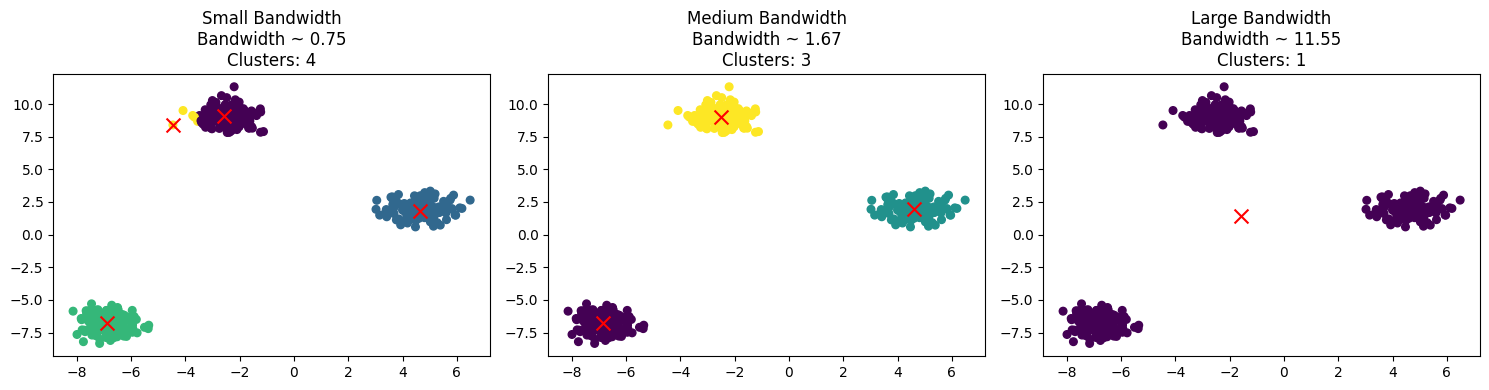

In [7]:
# --- 2. Bandwidth Sensitivity ---

# Generate dataset
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=42)

# Define different quantiles for bandwidth
quantiles = [0.1, 0.3, 0.5]  # small, medium, large bandwidth
titles = ['Small Bandwidth', 'Medium Bandwidth', 'Large Bandwidth']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, q in enumerate(quantiles):
    # Estimate bandwidth
    bandwidth = estimate_bandwidth(X, quantile=q, n_samples=500)
    
    # Apply Mean Shift
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    
    # Plot results
    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    axes[i].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, marker='x')
    axes[i].set_title(f"{titles[i]}\nBandwidth ~ {bandwidth:.2f}\nClusters: {len(np.unique(labels))}")

plt.tight_layout()
plt.show()

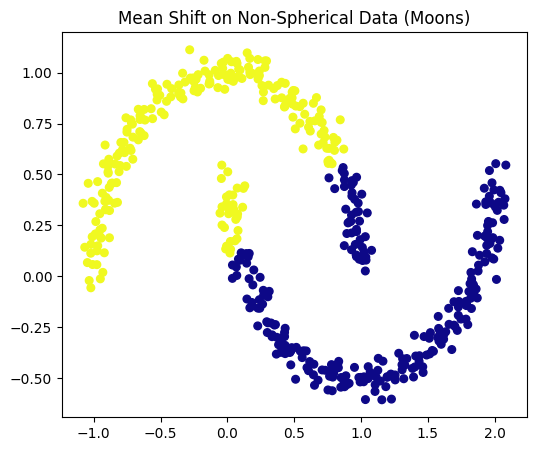

In [12]:
# --- 3. Dataset 2: Non-spherical (Moons) ---
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

# Apply Mean Shift
bandwidth = estimate_bandwidth(X_moons, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_moons)
labels_moons = ms.labels_

# --- Visualization ---
plt.figure(figsize=(6, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='plasma', s=30)
plt.title("Mean Shift on Non-Spherical Data (Moons)")
plt.show()

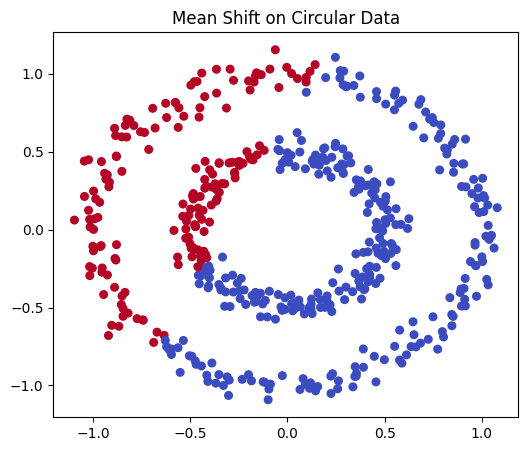

In [9]:
# --- 4. Dataset 3: Varying density (Circles) ---
X_circles, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)
bandwidth = estimate_bandwidth(X_circles, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_circles)
labels_circles = ms.labels_

plt.figure(figsize=(6, 5))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_circles, cmap='coolwarm', s=30)
plt.title("Mean Shift on Circular Data")
plt.show()

n=500, runtime=0.07s, clusters=3
n=1000, runtime=0.10s, clusters=3
n=2000, runtime=0.13s, clusters=3
n=5000, runtime=0.14s, clusters=3


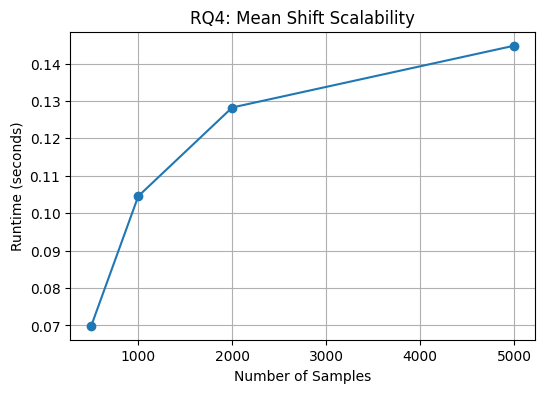

In [15]:
# --- 5. Scalability (Runtime vs Dataset Size) ---
sample_sizes = [500, 1000, 2000, 5000]
runtimes = []

for n in sample_sizes:
    X_large, _ = make_blobs(n_samples=n, centers=3, cluster_std=0.6, random_state=42)
    bandwidth = estimate_bandwidth(X_large, quantile=0.2, n_samples=min(n, 500))
    
    start_time = time.time()
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_large)
    runtime = time.time() - start_time
    runtimes.append(runtime)
    print(f"n={n}, runtime={runtime:.2f}s, clusters={len(np.unique(ms.labels_))}")

# Plot runtime vs number of samples
plt.figure(figsize=(6, 4))
plt.plot(sample_sizes, runtimes, marker='o')
plt.title("RQ4: Mean Shift Scalability")
plt.xlabel("Number of Samples")
plt.ylabel("Runtime (seconds)")
plt.grid(True)
plt.show()

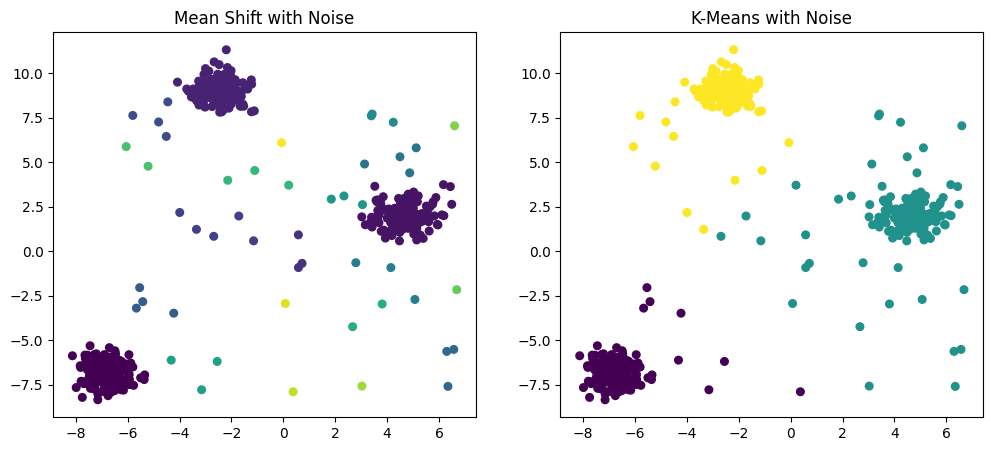

Silhouette Score: Mean Shift = 0.598, K-Means = 0.837


In [25]:
# --- 6. Robustness to Noise (Outliers) ---
X_base, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=42)

# Add uniform noise points
noise_points = np.random.uniform(low=-8, high=8, size=(50, 2))
X_noisy = np.vstack([X_base, noise_points])

# Mean Shift clustering
bandwidth = estimate_bandwidth(X_noisy, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_noisy)
labels_ms = ms.labels_

# K-Means for comparison
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_noisy)
labels_kmeans = kmeans.labels_

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X_noisy[:, 0], X_noisy[:, 1], c=labels_ms, cmap='viridis', s=30)
ax[0].set_title("Mean Shift with Noise")
ax[1].scatter(X_noisy[:, 0], X_noisy[:, 1], c=labels_kmeans, cmap='viridis', s=30)
ax[1].set_title("K-Means with Noise")
plt.show()

# Compute Silhouette Scores to quantify clustering quality
score_ms = silhouette_score(X_noisy, labels_ms)
score_km = silhouette_score(X_noisy, labels_kmeans)
print(f"Silhouette Score: Mean Shift = {score_ms:.3f}, K-Means = {score_km:.3f}")